In [2]:
import io
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/My Drive/MACHINE LEARNING/ML_Dataset_CO2Emission (1).csv')
print("Columns : ", df.columns)
df.describe()

Columns :  Index(['Engine_Size', 'Cylinders', 'Fuel_Consumption', 'CO2_Emissions'], dtype='object')


,Engine_Size,Cylinders,Fuel_Consumption,CO2_Emissions
count,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,256.228679
std,1.415895,1.797447,4.101253,63.372304
min,1.000000,3.000000,4.600000,108.000000
25%,2.000000,4.000000,10.250000,207.000000
50%,3.400000,6.000000,12.600000,251.000000
75%,4.300000,8.000000,15.550000,294.000000
max,8.400000,12.000000,30.200000,488.000000


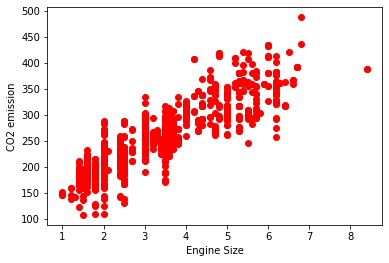

In [10]:
# df['Engine Size'] = df['Engine_Size']
# df['CO2 Emissions'] = df['CO2_emission']
plt.xlabel('Engine Size')
plt.ylabel('CO2 emission')
plt.scatter(df.Engine_Size, df.CO2_Emissions, color = 'red')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
training_data, testing

NameError: ignored

In [ ]:
plt.scatter(training_data.Engine_Size, training_data.CO2_Emissions, color = 'red')
plt.plot(train_x, slr.coef_[0][0]*train_x + slr.intercept_[0], '-r')
plt.xlable('Engine_Size')
plt.ylable('CO2_Emissions')

NameError: ignored

In [ ]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(testing_data[['Engine_Size']])
test_y = np.asanyarray(testing_data[['CO2_Emissions']])
test_y_ = slr.predict(test_x)
print("mean absolute error : %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print('residual sum of squares (MSE): %.2f' % np.mean((test_y_ - test_y))**2)
print('R2-score : &.2f' % r2_score(test_y, test_y_))